# Introductory Materials

Before we can start to explain anything about Quantum Linear Algebra, some background knowledge about quantum computing is required.

Dependancies for this notebook:

In [3]:
from qiskit.visualization import plot_bloch_vector

## Table of Contents 

* [What are Qubits?](#waq)
    * [The Bloch Sphere](#bloch)
* [Single Qubit Measurements and Phase](#sqmap)
* [Single Qubit Gates](#sqg)
* [Circuit Diagrams](#circuit)

##  What are Qubits? <a name="waq"></a>

Quantum bits -- or qubits -- are the fundamental units of information in quantum computation. Similar to classical bits, qubits have two distinct states that a quantum computer can read called *spin up* and *spin down*. Following common physics notation, called Dirac notation, these states are denoted by $|0\rangle$ and $|1\rangle$, respectively.

The spin states $|0\rangle$ and $|1\rangle$ for a qubit are defined as
\begin{equation}      
    |0\rangle :=  \begin{bmatrix}1\\0\end{bmatrix} \quad \text{and} \quad
    |1\rangle :=  \begin{bmatrix}0\\1\end{bmatrix}.
\end{equation}

The $|0\rangle$ and $|1\rangle$ states represent an orthonormal basis. This means that each state has a unit length of one and is orthogonal to the other state.

A general single qubit state is defined as a normalized linear combination of $|0\rangle$ and $|1\rangle$
\begin{equation}
    |\psi \rangle
    \in 
    \{ c_1 |0\rangle + c_2 |1\rangle~|~c_1,c_2\in\mathbb{C},~c_1^2 + c_2^2 =1\}.
\end{equation}     

Opposed to classical bits, qubits are not limited to the states $|0\rangle$ and $|1\rangle$ but can be in any general single qubit state as defined above. For example, the $|+\rangle$ and $|-\rangle$ states are defined as an even superposition of the $|0\rangle$ and $|1\rangle$ states, i.e.,
\begin{equation}
    |+\rangle := \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix}1\\1\end{bmatrix}
    \quad 
    \text{and}
    \quad
    |-\rangle := \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \frac{1}{\sqrt{2}} \begin{bmatrix}1\\-1\end{bmatrix},
\end{equation}
respectively.

### Bloch Sphere
A common technique for visualizing superposition states is the Bloch sphere. The Z-axis represents the probability of measuring $|0\rangle$ or $|1\rangle$. The X-axis represents the real component of that probability, and the Y-axis represents the imaginary component of that probability.

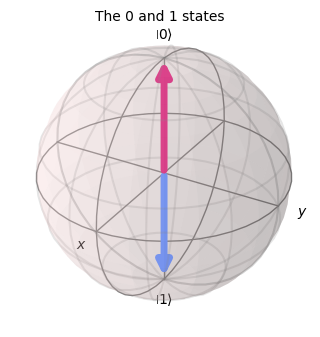

In [4]:
plot_bloch_vector(([0,0,1],[0,0,-1]), title='The 0 and 1 states', figsize=(3,3))

$$\text{Fig. }1:\text{ Bloch sphere denoting the states }|0\rangle \text{ (pink) and }|1\rangle\text{ (blue)}$$

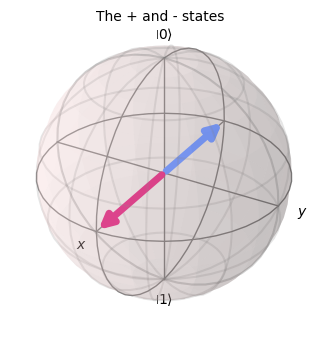

In [5]:
plot_bloch_vector(([1,0,0],[-1,0,0]), title='The + and - states', figsize=(3,3))

$$\text{Fig. }2:\text{ Bloch sphere denoting the states }|+\rangle \text{ (pink) and }|-\rangle\text{ (blue)}$$

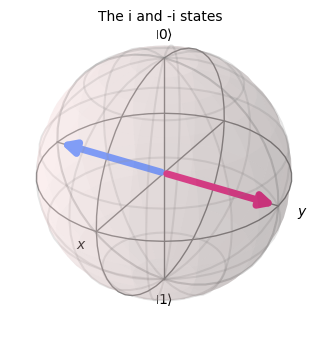

In [6]:
plot_bloch_vector(([0,1,0],[0,-1,0]), title='The i and -i states', figsize=(3,3))

$$\text{Fig. }3:\text{ Bloch sphere denoting the states }|i\rangle \text{ (pink) and }|-i\rangle\text{ (blue)}$$

Later when we are applying rotation to theses gates, the axes we are refering to are these axes on the bloch sphere.

### Multiqubit Representation

Multi-qubit systems are described via a single state vector. This vector is created by taking the tensor products of the respective single-qubit states. For the sake of readability, these tensor products are usually implicit, i.e.,
        \begin{equation}
            |\psi_1\rangle \otimes |\psi_2\rangle = |\psi_1\rangle|\psi_2\rangle = |\psi_1\psi_2\rangle.
        \end{equation}

A tensor product is a method of linearly combining two vectors into one single vector. Two vectors are needed for a tensor product. The order of the vectors matters. To preform a tensor product, scale the second vector by every element of first vectors, then stack all the scaled vectors ontop of eachother, in the same order as the first vector. 

For example, consider a two-qubit system where the first qubit is in the state $|0\rangle$, and the second qubit is in the state $|1\rangle$. The corresponding state vector is then given by 
\begin{equation}
    |0\rangle \otimes |1\rangle = \begin{bmatrix}1\\0\end{bmatrix} \otimes \begin{bmatrix}0\\1\end{bmatrix} = 
    \begin{bmatrix}
    1 \begin{bmatrix}0\\1\end{bmatrix}\\
    0 \begin{bmatrix}0\\1\end{bmatrix}
    \end{bmatrix} = \begin{bmatrix}0\\1\\0\\0\end{bmatrix} = |01\rangle.
\end{equation}

Since a tensor product is a linear operation, the order in which the tensor products are done doesn't matter.

Another explaination of tensor products can be found here: https://www.math3ma.com/blog/the-tensor-product-demystified

## Single Qubit Measurements and Phase <a name="sqmap"></a>

When measuring a qubit in superposition, it collapses into one of its superimposed states with some probability. The respective probabilities are related to the *probability amplitudes* given by the inner product of the current state with the measured state. This inner product, called the *overlap* of the states, is not guaranteed to be real nor positive, which is required for probabilities. Thus, the probability of collapsing to a specific state is given by the overlap times its complex conjugate. This is also called the modulus squared of the overlap. Continuing with the physics notation, the conjugate transpose is denoted by ``$\dagger$'', and the adjoint of a state is denoted by $\langle \psi|$.

The probability of measuring a single-qubit state $|\phi\rangle$ to be in the state $|\psi\rangle$ is given by the modulus square of the overlap, i.e.,
            \begin{equation}
                \mathbb{P}(X \in \{|\psi\rangle\}) = \left|\langle\psi|\phi\rangle\right|^2,
            \end{equation}
            where $X$ is a random variable representing the measurement of $|\phi\rangle$.
        
        
For example, the probability of measuring the $|+\rangle$ state to be in the $|0\rangle$ state can be determined using vector notation
            \begin{equation}
            |\langle 0|+\rangle|^2 = \left|\begin{bmatrix}1\\0\end{bmatrix}^\dagger\frac{1}{\sqrt{2}}\begin{bmatrix}1\\1\end{bmatrix}\right|^2 = \left|\begin{bmatrix}1&0\end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix}1\\1\end{bmatrix}\right|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}
            \end{equation}
            or Dirac notation
            \begin{equation}
            |\langle 0|+\rangle|^2 = \left|\langle 0|\left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right)\right|^2 = \left|\frac{1}{\sqrt{2}}(\langle 0|0\rangle + \langle 0|1\rangle)\right|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2},
            \end{equation}
            where we used the orthonormality of the space to determine that $\langle 0|0\rangle = 1$ and $\langle 0|1\rangle = 0$. This means that a qubit initially in the $|+\rangle$ state will collapse to the $|0\rangle$ state upon measurement with a probability of $1/2$.
        
Since the modulus square is invariant under rotation, i.e., multiplying the expansion coefficients of a state by $e^{i2\pi\varphi}$ with $\varphi \in [0,1)$, there exist multiple states that collapse to the same state with the same probability. The quantity $e^{i2\pi\varphi}$ is called the \emph{phase} and $2\pi\varphi$ is called the \emph{phase angle}. There are two types of phase, the phase between different state vectors, called \emph{global phase}, and the phase between bit strings in the same state vector, called \emph{relative phase}. Here, $\varphi$ acts as the fraction of a full rotation of $2 \pi$ around the complex unit circle. The idea of relative vs. global phase is expanded upon later.


## Single Qubit Gates

In general, the initial state of a qubit in a quantum circuit is not in the desired state for computation; they must first be initialized. The following single qubit gates are common ways to adjust the states of individual qubits.
        Definition:
            In matrix form, the gates $X$, $Z$, $R_z$, and Hadamard $(H)$ are defined as
            \begin{equation}
                X := \begin{bmatrix}0&1\\1&0\end{bmatrix}, \quad
                Z := \begin{bmatrix}1&0\\0&-1\end{bmatrix}, \quad
                R_z(\theta) = \begin{bmatrix}
                    e^{-i\theta/2} & 0 \\
                    0 & e^{i\theta/2}
                \end{bmatrix} \quad
                \text{and} \quad
                H :=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1\\1 & -1\end{bmatrix}, 
            \end{equation}
            respectively. The $X$-gate is a bit flip, the $Z$-gate is a phase flip, the $R_z(\theta)$-gate is a phase rotation of $\theta$ about the $z$-axis, and the Hadamard gate puts a single qubit into an even superposition of $|0\rangle$ and $|1\rangle$. 

### X-gate
The $X$-gate is a bit flip, which is a $180^{\circ}$ rotation around the $x$-axis on the Bloch sphere.
$$X = \begin{pmatrix}0&1\\1&0\end{pmatrix}$$
$$X|0\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix} = |1\rangle$$
$$X|1\rangle = \begin{pmatrix}0&1\\1&0\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle$$
The $X$-Basis is $|+\rangle$ and $|-\rangle$

### Z-gate
The $Z$-gate is a phase-flip, which is a $180^{\circ}$ rotation around the $z$-axis on the Bloch sphere.
$$Z = \begin{pmatrix}1&0\\0&-1\end{pmatrix}$$
$$Z|0\rangle = \begin{pmatrix}1&0\\0&-1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle$$
$$Z|1\rangle = \begin{pmatrix}1&0\\0&-1\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}0\\-1\end{pmatrix} = -|1\rangle$$
The $Z$-Basis is $|0\rangle$ and $|1\rangle$

### $R_z$-gate

The $R_z$-gate is a $\theta$ rad rotation about the $z$-axis written as
        \begin{equation}
        R_z(\theta) = \begin{bmatrix}e^{-i\theta/2}&0\\0&e^{i\theta/2}\end{bmatrix}.
        \end{equation}
        It acts on the states $|0\rangle$ and $|1\rangle$ in the following way. 
        \begin{align}
            R_z(\theta)|0\rangle &= \begin{bmatrix}e^{-i\theta/2}&0\\0&e^{i\theta/2}\end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix} = e^{-i\theta/2} \begin{bmatrix}1\\0\end{bmatrix} = e^{-i\theta/2} |0\rangle,\\
            R_z(\theta)|1\rangle &= \begin{bmatrix}e^{-i\theta/2}&0\\0&e^{i\theta/2}\end{bmatrix}\begin{bmatrix}0\\1\end{bmatrix} = e^{i\theta/2}\begin{bmatrix}0\\1\end{bmatrix} = e^{i\theta/2}|1\rangle.
        \end{align}
        Recall that $\left|e^{i\gamma}\right|^2=1$, so the states $|0\rangle$ and $e^{i\theta/2}|0\rangle$ are indistinguishable upon measurement. This is also true for the states $|1\rangle$ and $e^{-i\theta/2}|1\rangle$.

### Y-gate
The $Y$-gate is a phase-flip and a bit flip, which is a $180^{\circ}$ rotation around the $y$-axis on the Bloch sphere.
$$Y = \begin{pmatrix}0&-i\\i&0\end{pmatrix}$$
$$Y|0\rangle = \begin{pmatrix}0&-i\\i&0\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}0\\i\end{pmatrix} = i|1\rangle$$
$$Y|1\rangle = \begin{pmatrix}0&-i\\i&0\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}-i\\0\end{pmatrix} = -i|0\rangle$$
The $Y$-Basis is $|i\rangle$ and $|-i\rangle$ explicitly denoted below.

$$|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\i\end{pmatrix}$$
$$|-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\-i\end{pmatrix}$$

### I-Gate
The Identity Gate does nothing to the state that is put into it. 
$$I = \begin{pmatrix}1&0\\0&1\end{pmatrix}$$
$$I|0\rangle = \begin{pmatrix}1&0\\0&1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}1\\0\end{pmatrix} = |0\rangle$$
$$I|1\rangle = \begin{pmatrix}1&0\\0&1\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}0\\1\end{pmatrix} = |1\rangle$$

### H-Gate
The Hadamard Gate puts an individual qubit into superposition.

$$H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$

$$H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{pmatrix}$$


$$H|1\rangle =  \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix} = \begin{pmatrix}\frac{1}{\sqrt{2}}\\-\frac{1}{\sqrt{2}}\end{pmatrix}$$

In Dirac notation, these states are represented as

$$H|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) = |+\rangle$$
$$H|1\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) = |-\rangle$$

Note that after a $Z$ or $R_z$ gate is applied to the $|1\rangle$ state, the measurement probability remains the same, i.e.,
    \begin{gather}
        \mathbb{P}(A\in\{|1\rangle\}) = |\langle 1|Z|1\rangle|^2 = |-1|^2 = 1, \quad \\
        \mathbb{P}(B\in\{|1\rangle\}) = |\langle 1|R_z(\theta)|1\rangle|^2 = \left|e^{i\theta/2}\right|^2 = 1,
    \end{gather} where $A$ is a random variable representing the measurement of $Z$ applied to $|1\rangle$, and $B$ is a random variable representing the measurement of $R_z(\theta)$ applied to $|1\rangle$. 
            
Since these gates leave the state unchanged with some complex coefficient, this can be written more generally with an arbitrary unitary operator $U$ and quantum state $|\psi\rangle$ as the eigenvalue problem, i.e.,
    \begin{equation}
        U|\psi\rangle = \lambda|\psi\rangle.
    \end{equation}
    Since the total probability of a quantum state must be exactly one, the modulus squared of the eigenvalue (probability amplitude) must also be one. Eigenvalues of the form $\lambda = e^{i2\pi \varphi}$ satisfy this condition (\cref{rmk:modsq}).

Expanding on phase, this $\lambda$ is a global phase acting on the full state vector. Since phase is invariant under the modulus square operation, both global and relative phase can be ignored when calculating measurement probabilities. For example, consider $R_z(\theta)$ acting on the $|+\rangle$ state, i.e.,
        \begin{equation}
            R_z(\theta)|+\rangle = \frac{1}{\sqrt{2}}\left(e^{-i\theta/2}|0\rangle + e^{i\theta/2}|1\rangle\right) = \frac{e^{-i\theta/2}}{\sqrt{2}}\left(|0\rangle + e^{i\theta}|1\rangle\right).
        \end{equation}
        Factoring out a $e^{-i\theta/2}$, it is clear that there is a global phase of $e^{-i\theta/2}$ and a relative phase of $e^{i\theta}$ between the states $|0\rangle$ and $|1\rangle$. Even with the phase the probability of measuring either $|0\rangle$ or $|1\rangle$ is still $1/2$.

## More Qubit Gates

There are qubit gates that require two or more qubits as input. Usually these gates have some number of control qubits and some number of answer qubits. One specific example is the $CNOT$ gate

### $CNOT$-Gate
One controlled gate is the $CNOT_{01}$ gate (can also be written as $CX_{01}$). The first number of the subscript is the control qubit's number and the second number is the target qubit's number. The convention for notating which qubit is the target qubit and which qubit is the control qubit is not currently standardized.
$$CNOT_{01}|00\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix} = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} = |00\rangle$$
$$CNOT_{01}|01\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\1\\0\\0\end{pmatrix} = \begin{pmatrix}0\\1\\0\\0\end{pmatrix} = |01\rangle$$
$$CNOT_{01}|10\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\0\\1\\0\end{pmatrix} = \begin{pmatrix}0\\0\\0\\1\end{pmatrix} = |11\rangle$$
$$CNOT_{01}|11\rangle = \begin{pmatrix}1&0&0&0 \\ 0&1&0&0 \\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}\begin{pmatrix}0\\0\\0\\1\end{pmatrix} = \begin{pmatrix}0\\0\\1\\0\end{pmatrix} = |10\rangle$$

### Deriving a Matrix for an Arbitrary Gate
A usefull skill to have is the ability to create a gate from its expected input and output.
Suppose we knew of a gate such that:
$$U|00\rangle = |11\rangle$$
$$U|10\rangle = |01\rangle$$
$$U|01\rangle = |10\rangle$$
$$U|11\rangle = |00\rangle$$
To create a matrix for this operation, we can add the inner products of the hermitians all the input states times each of their own output.

$$U = |00\rangle \langle 11| + |01\rangle \langle 10| + |10\rangle \langle 01| + |10\rangle \langle 01| + |11\rangle \langle 00|$$

$$U = \begin{pmatrix}1\\0\\0\\0\end{pmatrix} \begin{pmatrix}0&0&0&1\end{pmatrix} + \begin{pmatrix}0\\1\\0\\0\end{pmatrix} \begin{pmatrix}0&0&1&0\end{pmatrix} + \begin{pmatrix}0\\0\\1\\0\end{pmatrix} \begin{pmatrix}0&1&0&0\end{pmatrix} + \begin{pmatrix}0\\0\\0\\1\end{pmatrix} \begin{pmatrix}1&0&0&0\end{pmatrix}$$

$$U = \begin{pmatrix}0&0&0&1\\0&0&0&0\\0&0&0&0\\0&0&0&0\end{pmatrix} + \begin{pmatrix}0&0&0&0\\0&0&1&0\\0&0&0&0\\0&0&0&0\end{pmatrix} + \begin{pmatrix}0&0&0&0\\0&0&0&0\\0&1&0&0\\0&0&0&0\end{pmatrix} + \begin{pmatrix}0&0&0&0\\0&0&0&0\\0&0&0&0\\1&0&0&0\end{pmatrix} = \begin{pmatrix}0&0&0&1\\0&0&1&0\\0&1&0&0\\1&0&0&0\end{pmatrix}$$

Then benefit of this notation is how clearly it maps input to output. Suppose we wanted to find the what the state $|00\rangle$ outputs:

$$U|00\rangle = |00\rangle \langle 11|00\rangle + |01\rangle \langle 10|00\rangle + |10\rangle \langle 01|00\rangle + |10\rangle \langle 01||00\rangle +|11\rangle \langle 00|00\rangle = 0|00\rangle + 0|01\rangle+0|10\rangle+1|11\rangle  = |11\rangle$$

## Circuit Diagrams
A circuit diagram is a graphical representation that describes the workflow of a quantum algorithm. Quantum circuits are read from left to right as operations or gates are applied over time on lines representing the qubits. In general, one line in a circuit diagram corresponds to a single qubit; however, if a line has a slash through it, e.g. the third line, it represents multiple qubits. Applying a gate to a qubit is represented as a box on the qubit's line. Some gate operations depend on other qubits -- called control qubits -- states. These controls are denoted by a dot drawn over the control qubit with a line connected to the gate it is controlling, see $|\pi_2\rangle$ . To denote swapping two qubits states, a $(\times)$ is drawn over the swapping qubits with a line connecting them, see $|\pi_3\rangle$ . Applying a gate to multiple qubits is shown with a box over all the qubits such as at $|\pi_4\rangle$ . Measurement is depicted with a ``meter-like" symbol in a box on the qubit being measured like shown in the first line at the end of the circuit. Finally, a double line denotes classical information, such as after a measurement has been performed. 


![Circuit Example](images/2-circuit_example.png)

*An example quantum circuit diagram showing a multi-qubit slash on the third line in the state $|\psi\rangle$, a Hadamard $(H)$ gate on the first qubit (line), a controlled $X$-gate controlled on the first qubit targeting the second, a swap operation between the first and second qubits, an arbitrary multi-qubit $U$ gate, and a measurement operator on the first qubit.*